In [9]:
import os
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

def process_file(file_path):
    counter = Counter()
    total_tokens = 0
    total_sentences = 0
    total_word_length = 0

    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        sentences = sent_tokenize(text)
        total_sentences += len(sentences)
        
        for sentence in sentences:
            tokens = word_tokenize(sentence)
            total_tokens += len(tokens)
            total_word_length += sum(len(token) for token in tokens)
            counter.update(tokens)

    total_types = len(counter)
    total_words = sum(counter.values())
    average_words_per_sentence = total_words / total_sentences
    average_word_length = total_word_length / total_words

    words = list(counter.elements())
    tagged = pos_tag(words)
    pos_counter = Counter(tag for word, tag in tagged)
    most_common_pos = pos_counter.most_common(10)

    return {
        'total_tokens': total_tokens,
        'total_types': total_types,
        'total_words': total_words,
        'average_words_per_sentence': average_words_per_sentence,
        'average_word_length': average_word_length,
        'most_common_pos': most_common_pos,
        'word_frequencies': counter,
    }

file_paths = ["babylm_10M/bnc_spoken.train", "babylm_10M/children_stories.train"]

results = []
for file_path in file_paths:
    print(f"Processing {file_path}...")
    result = process_file(file_path)
    results.append(result)
    print(result)

Processing babylm_10M/bnc_spoken.train...
{'total_tokens': 1024660, 'total_types': 23958, 'total_words': 1024660, 'average_words_per_sentence': 14.044903777619387, 'average_word_length': 3.512415825737318, 'most_common_pos': [('NN', 116873), ('PRP', 109053), ('IN', 82597), ('RB', 81736), ('DT', 77604), ('.', 73728), ('NNP', 62510), ('JJ', 52243), (',', 49012), ('VBP', 34359)], 'word_frequencies': Counter({'.': 51449, ',': 49012, 'the': 33083, 'I': 28528, 'to': 20284, 'you': 19242, 'and': 19017, 'it': 18832, 'that': 18220, "'s": 18018, 'a': 16821, 'of': 15535, '?': 14369, 'in': 12200, "n't": 11582, 'is': 8788, 'we': 7947, 'do': 7915, '!': 7910, 'they': 7204, 'was': 6660, 'on': 6658, 'er': 6554, 'he': 6452, 'have': 6306, 'for': 5723, 'there': 5607, 'Yeah': 5419, 'be': 5330, 'this': 4758, 'know': 4712, 'what': 4613, 'one': 4298, 'got': 4267, 'erm': 4206, 'not': 4086, "'ve": 3963, 'but': 3942, 'Oh': 3926, 'are': 3876, 'at': 3872, "'re": 3829, 'think': 3784, 'with': 3760, 'as': 3667, 'like'

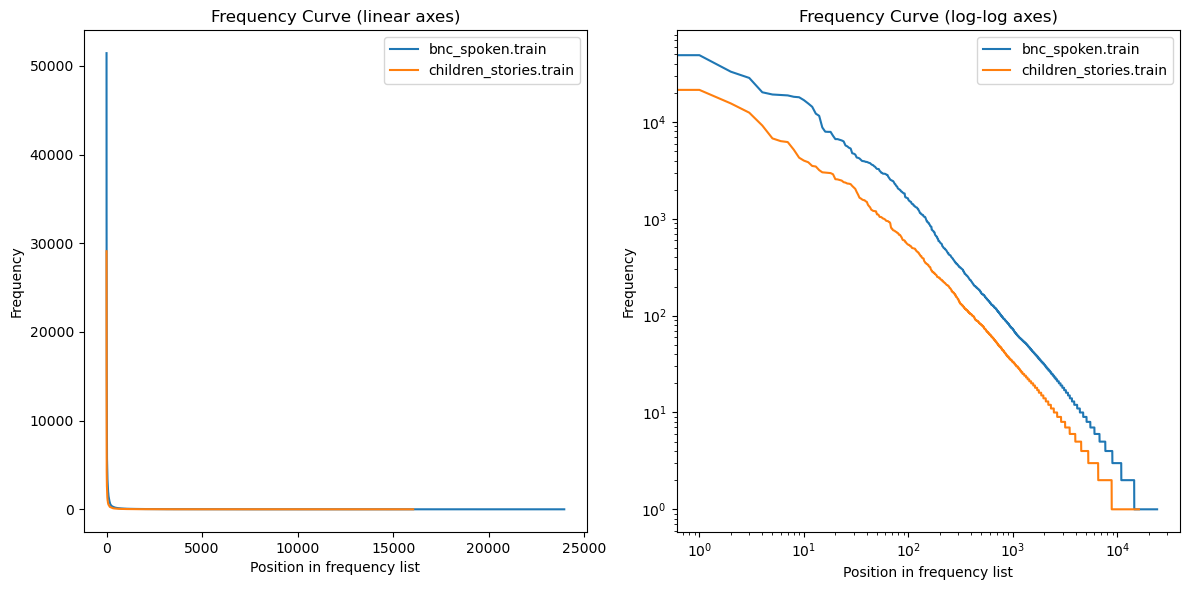

In [10]:
plt.figure(figsize=(12, 6))

for result, file_path in zip(results, file_paths):
    frequencies = sorted(list(result['word_frequencies'].values()), reverse=True)
    
    label = os.path.basename(file_path)

    plt.subplot(1, 2, 1)
    plt.plot(frequencies, label=label)
    plt.title('Frequency Curve (linear axes)')
    plt.xlabel('Position in frequency list')
    plt.ylabel('Frequency')
    plt.legend()

    # Plot frequency curve with log-log axes
    plt.subplot(1, 2, 2)
    plt.loglog(frequencies, label=label)
    plt.title('Frequency Curve (log-log axes)')
    plt.xlabel('Position in frequency list')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()